# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


5b20f3ead8b2c6e1e3d73fc082951a2c


### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data=[]

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paamiut
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | lobva
Processing Record 5 of Set 1 | changying
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | kikwit
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | korla
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | kyshtovka
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | cap malheureux
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | ozinki
Processing Record 22 of Set 1 | new norfolk
Processing Rec

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paamiut,61.9940,-49.6678,33.37,75,100,4.25,GL,1680574652
1,albany,42.6001,-73.9662,54.01,62,100,4.99,US,1680574462
2,busselton,-33.6500,115.3333,68.31,53,38,9.84,AU,1680574652
3,lobva,59.1854,60.5185,35.46,96,100,8.03,RU,1680574652
4,changying,52.8733,123.3213,26.06,49,2,14.47,CN,1680574653


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paamiut,61.9940,-49.6678,33.37,75,100,4.25,GL,1680574652
1,albany,42.6001,-73.9662,54.01,62,100,4.99,US,1680574462
2,busselton,-33.6500,115.3333,68.31,53,38,9.84,AU,1680574652
3,lobva,59.1854,60.5185,35.46,96,100,8.03,RU,1680574652
4,changying,52.8733,123.3213,26.06,49,2,14.47,CN,1680574653


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

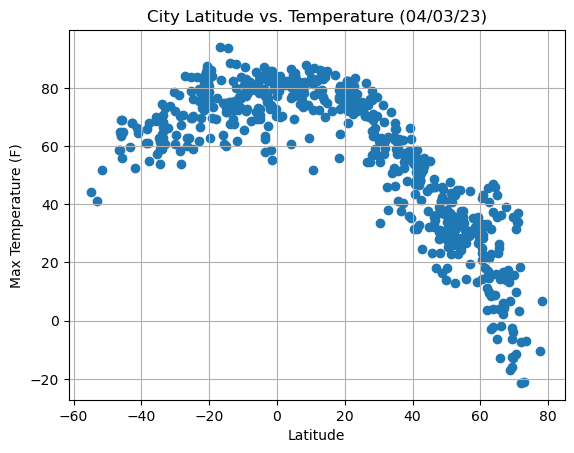

In [61]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. {'Temperature'} ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

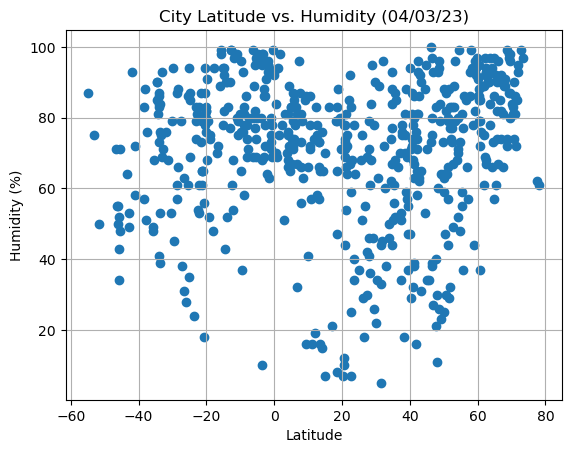

In [64]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. {'Humidity'} ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

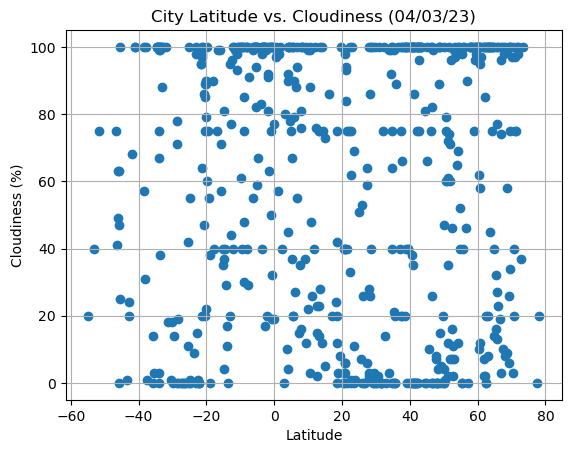

In [70]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. {'Cloudiness'} ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

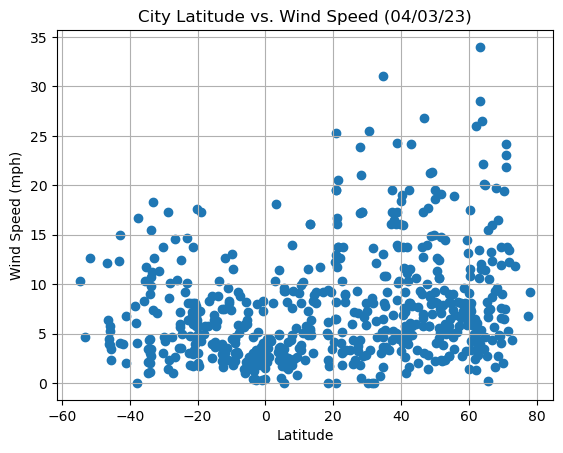

In [71]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. {'Wind Speed'} ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values,text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    print(f"The r-value is: {r_value}")


In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paamiut,61.9940,-49.6678,33.37,75,100,4.25,GL,1680574652
1,albany,42.6001,-73.9662,54.01,62,100,4.99,US,1680574462
3,lobva,59.1854,60.5185,35.46,96,100,8.03,RU,1680574652
4,changying,52.8733,123.3213,26.06,49,2,14.47,CN,1680574653
9,korla,41.7597,86.1469,33.01,16,0,11.14,CN,1680574654


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,busselton,-33.6500,115.3333,68.31,53,38,9.84,AU,1680574652
5,ushuaia,-54.8000,-68.3000,44.26,87,20,10.36,AR,1680574653
6,alofi,-19.0595,-169.9187,84.09,74,38,17.27,NU,1680574653
7,kikwit,-5.0410,18.8162,70.83,96,100,1.41,CD,1680574653
8,hermanus,-34.4187,19.2345,53.80,81,100,4.36,ZA,1680574654


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9036570360040799


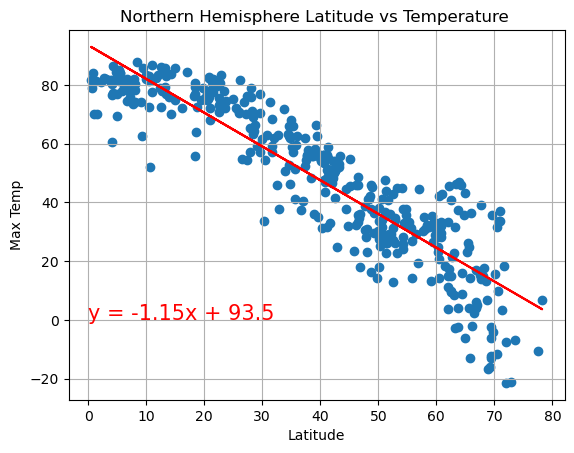

In [87]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f'Northern Hemisphere Latitude vs Temperature ')
plot_linear_regression(x_values, y_values, (0,0))
plt.grid(True)

The r-value is: 0.5706009502490486


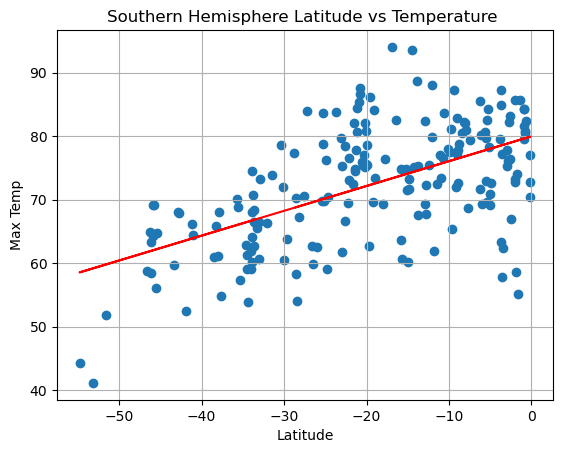

In [89]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f'Southern Hemisphere Latitude vs Temperature ')
plot_linear_regression(x_values, y_values, (0,0))
plt.grid(True)

**Discussion about the linear relationship:** 
The relationship between the northern and southern hemispheres is inverse; where both show that max temperature incease the closer the proximity to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2601752709024954


Text(0, 0.5, 'Humidity')

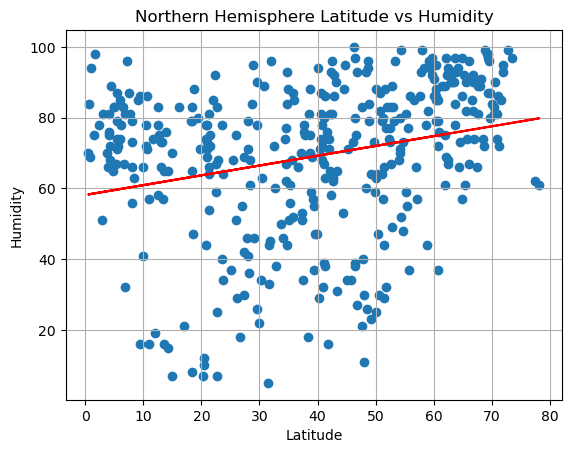

In [107]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f'Northern Hemisphere Latitude vs Humidity')
plot_linear_regression(x_values, y_values, (0,0))
plt.grid(True)
plt.ylabel("Humidity")

The r-value is: 0.3644532248173769


Text(0, 0.5, 'Humidity')

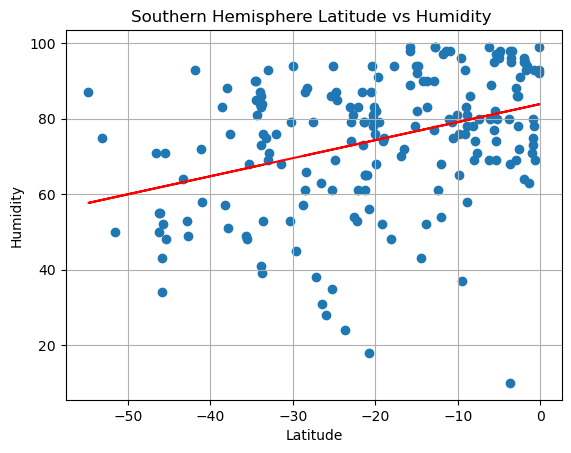

In [106]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f'Southern Hemisphere Latitude vs Humidity ')
plot_linear_regression(x_values, y_values, (0,0))
plt.grid(True)
plt.ylabel("Humidity")

**Discussion about the linear relationship:** There is a coorelation between both hemispheres as humidity increases the closer you get to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07002346075839395


Text(0, 0.5, 'Cloudiness')

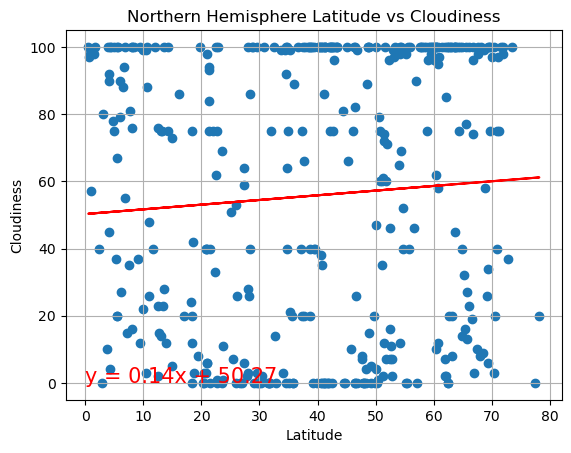

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')
plot_linear_regression(x_values, y_values, (0,0))
plt.grid(True)
plt.ylabel("Cloudiness")

The r-value is: 0.29295004115350165


Text(0, 0.5, 'Cloudiness')

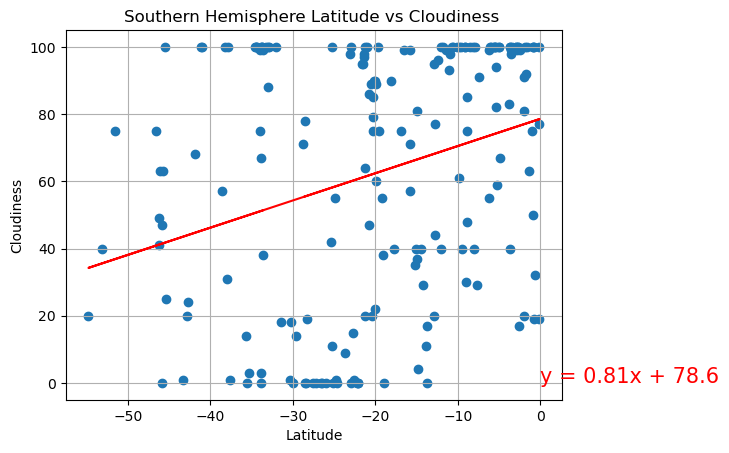

In [105]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f'Southern Hemisphere Latitude vs Cloudiness ')
plot_linear_regression(x_values, y_values, (0,0))
plt.grid(True)
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** There does not seem to be strong enough data to show a coorelation between cloudiness and proximity to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.20199638843750964


Text(0, 0.5, 'Wind Speed')

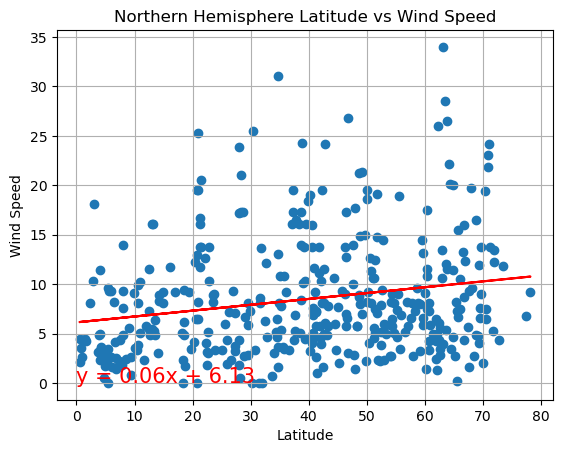

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title(f'Northern Hemisphere Latitude vs Wind Speed')
plot_linear_regression(x_values, y_values, (0,0))
plt.grid(True)
plt.ylabel("Wind Speed")

The r-value is: -0.3182851869437835


Text(0, 0.5, 'Wind Speed')

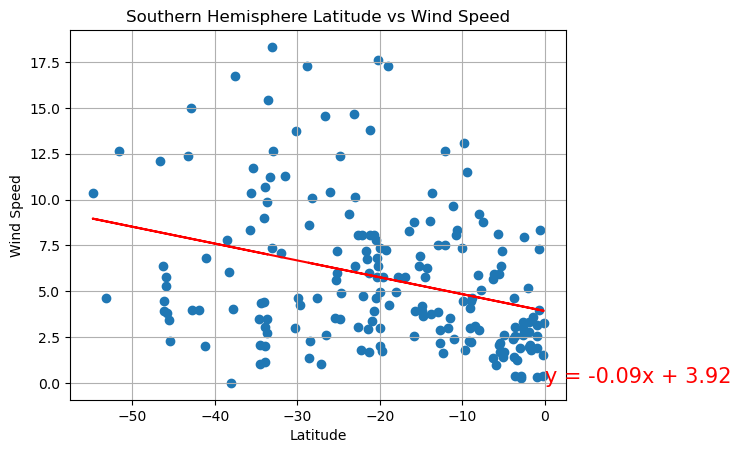

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title(f'Southern Hemisphere Latitude vs Wind Speed')
plot_linear_regression(x_values, y_values, (0,0))
plt.grid(True)
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** There seems to be a very slight inverse relationship and proximity to the equator.